#Importing

In [ ]:
!pip install ipympl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.0 MB/s eta 0:00:00


In [ ]:
from PIL import Image
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import math

In [ ]:
%matplotlib widget
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
CAMERA_MAN_PATH = '/content/drive/MyDrive/Semester 8/Computer Vision/HW/2/Camera Man.bmp'
ELAINE_PATH = '/content/drive/MyDrive/Semester 8/Computer Vision/HW/2/Elaine.bmp'
LEVELS = 256

# 2.1. Histogram

## 2.1.1.
Write a program that can compute the histogram of a grayscale image. (Test on Camera Man)

In [ ]:
def create_histogram(img):
  c, r = img.shape
  histogram = np.zeros(shape=256)
  for x in range(c):
    for y in range(r):
        i = img[x,y]
        histogram[i] += 1
  return histogram

In [ ]:
camera_man_img = Image.open(CAMERA_MAN_PATH)
cm_img = np.asarray(camera_man_img)

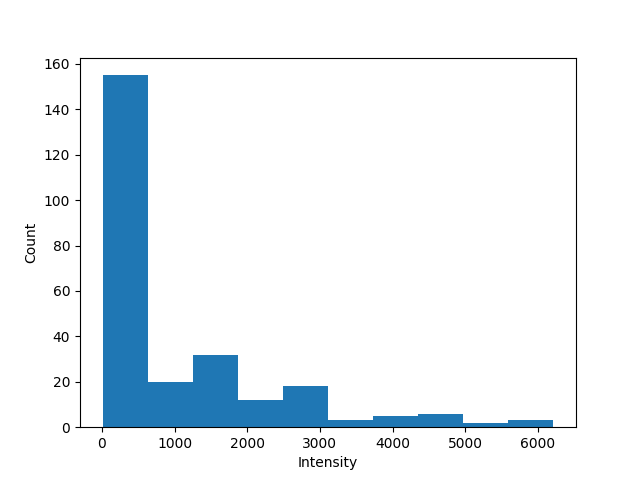

In [ ]:
hg = create_histogram(cm_img)
plt.figure()
plt.xlabel('Intensity')
plt.ylabel('Count');
plt.hist(hg)
plt.show()

## 2.1.2.
Perform histogram equalization on a grayscale image and compare the new image with the original image. (Test on Camera Man)

In [ ]:
c,r = cm_img.shape
normal = hg / (c*r)
sum = 0
s = []
for n in normal:
  sum += (LEVELS - 1) * n
  s.append(math.ceil(sum))

In [ ]:
equal_image = cm_img.copy()
for (i, j), pixel in  np.ndenumerate(cm_img):
  equal_image[i][j] = s[pixel]

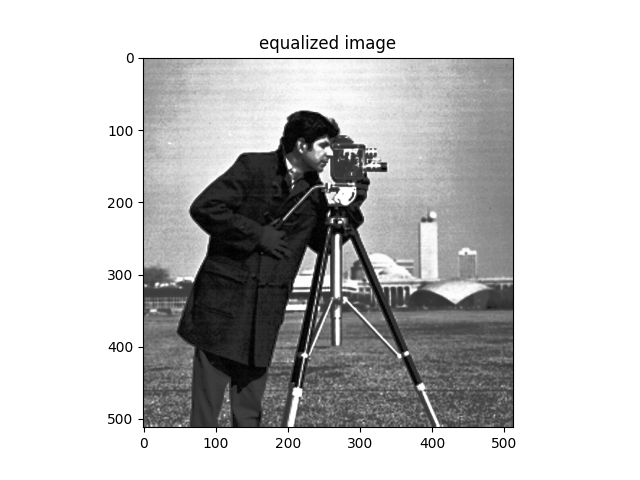

In [ ]:
plt.figure()
plt.imshow(cm_img, cmap='gray')
plt.title("original image")
plt.figure()
plt.imshow(equal_image, cmap='gray')
plt.title("equalized image")
plt.show()

#2.2 Filters

## 2.2.1.
Write a program that can, first, add salt-and-pepper noise to an image with a specified noise density. Try different noise density (0.05, 0.1, 0.2, 0.4). Then, perform median filtering with a specified window size. Consider only the median filter with a square shape. For each density, discuss the effect of filtering with different window sizes (3, 5, 7, 9) and experimentally determine the best window size.  <br/>

**Note**: you can use imnoise and MSE functions to generate noisy images and compare the quality of images, respectively. Also, you can ignore the boundary problem by only performing the filtering for the pixels inside the boundary. (Test on grayscale Elaine Image).

In [ ]:
img = np.asarray(Image.open(ELAINE_PATH))

In [ ]:
def create_noisy_image(img, density):
  noisy_img = np.copy(img)
  noise_pixels_number = int(density * img.shape[0] * img.shape[1])
  # Generate a noise_pixels_number x 2 array of ints between 0 and img.shape[0].
  noise_coords = np.random.randint(0, img.shape[0], size=(noise_pixels_number, 2)) #coordinates of pixels that are gonna be noise
  # fill noise coordiantes with 255 or 0  randomly
  noisy_img[noise_coords[:,0], noise_coords[:,1]] = np.random.choice([0, 255], size=(noise_pixels_number,))
  return noisy_img

In [ ]:
def median_average_filter(window_size, noisy_img, filter_name):
   filtered_img = np.zeros_like(noisy_img)
   half_size = window_size // 2


   for i in range(half_size, img.shape[0]-half_size):
     for j in range(half_size, img.shape[1]-half_size):

      window = noisy_img[i-half_size:i+half_size+1, j-half_size:j+half_size+1]
      if filter_name == 'median':
        filtered_img[i,j] = np.median(window)
      elif filter_name == 'average':
        filtered_img[i,j] = np.mean(window)
    # mean squared error
   mse = np.mean((filtered_img - img)**2)
   return filtered_img, mse

In [ ]:
densities = [0.05, 0.1, 0.2, 0.4]
window_sizes = [3, 5, 7, 9]

for density in densities:

  noisy_img = create_noisy_image(img, density)

  for window_size in window_sizes:

    _, mse = median_average_filter(window_size, noisy_img, 'median')
    print(f"Noise density: {density}, Window size: {window_size}, MSE: {mse}")

Noise density: 0.05, Window size: 3, MSE: 28.648677825927734
Noise density: 0.05, Window size: 5, MSE: 33.83686065673828
Noise density: 0.05, Window size: 7, MSE: 36.45707321166992
Noise density: 0.05, Window size: 9, MSE: 40.49979019165039
Noise density: 0.1, Window size: 3, MSE: 29.689979553222656
Noise density: 0.1, Window size: 5, MSE: 34.52041244506836
Noise density: 0.1, Window size: 7, MSE: 36.89713668823242
Noise density: 0.1, Window size: 9, MSE: 40.76784133911133
Noise density: 0.2, Window size: 3, MSE: 31.666934967041016
Noise density: 0.2, Window size: 5, MSE: 35.46621322631836
Noise density: 0.2, Window size: 7, MSE: 37.54867172241211
Noise density: 0.2, Window size: 9, MSE: 41.14060974121094
Noise density: 0.4, Window size: 3, MSE: 37.02145004272461
Noise density: 0.4, Window size: 5, MSE: 37.85653305053711
Noise density: 0.4, Window size: 7, MSE: 39.24041748046875
Noise density: 0.4, Window size: 9, MSE: 42.45918655395508


**Result** <br/>
As the density of noise increases, it is evident that the error rate also increases. Similarly, when it comes to the window size, it is observed that the larger the window size, the greater the error
<hr/>

## 2.2.2.
Create a program for adding Gaussian noise with different variance and filtering using average and median filter, respectively. Apply the averaging filter and the median filter to an image with Gaussian noise (with a chosen noise variance). <br/>
**Note**: You can use imnoise and MSE functions to generate noisy images and compare the quality of images, respectively. (Test on grayscale Elaine Image)

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
mean = 0
variances = [100, 200, 300, 400]

In [ ]:
def add_gaussian_noise(variance):
  gaussian_noise = np.random.normal(loc= mean,
                                  scale= np.sqrt(variance),
                                  size= img.shape)
  noisy_img = img + gaussian_noise

  for i in range(noisy_img.shape[0]):
    for j in range(noisy_img.shape[1]):
      if noisy_img[i][j] < 0:
        noisy_img[i][j] = 0
      if noisy_img[i][j] > 255:
        noisy_img[i][j] = 255

  return noisy_img

variance =100 - median filter MSE= 535.1727199791707, average filter MSE= 554.6584579626341
variance =200 - median filter MSE= 540.1630229763014, average filter MSE= 556.484559618682
variance =300 - median filter MSE= 545.0344646724716, average filter MSE= 558.7390525264061
variance =400 - median filter MSE= 549.8130885728801, average filter MSE= 561.24861003973


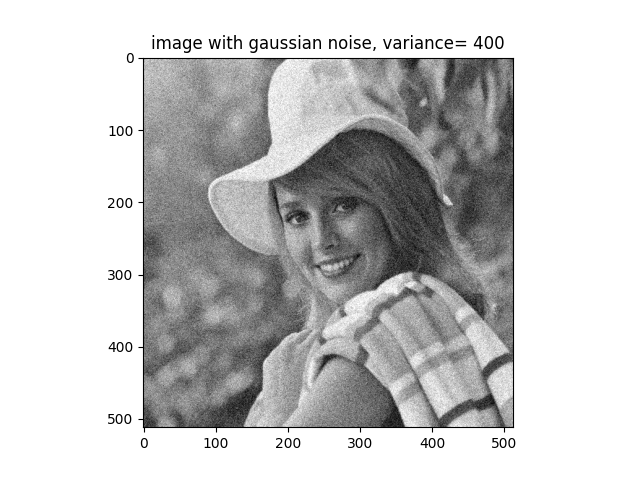

In [ ]:
for variance in variances:
  noisy_img = add_gaussian_noise(variance)
  plt.figure()
  plt.imshow(noisy_img, cmap='gray')
  plt.title(f'image with gaussian noise, variance= {variance}')
  _, mse_median = median_average_filter(7,noisy_img, 'median')
  _, mse_average = median_average_filter(7, noisy_img, 'average')
  print(f'variance ={variance} - median filter MSE= {mse_median}, average filter MSE= {mse_average}')
plt.show()

## 2.2.3.
These are often used first-order difference filters in x-direction:
<img src='https://i.ibb.co/fxFvZng/Annotation-2023-04-16-131757.jpg'>
Compare the properties of the three filters; (Test on grayscale Elaine Image)

filter_a --> highlights horizontal edges
filter_b -->

In [ ]:
filter_a = np.array (
  [1,0,-1]
                     )  / 2
filter_b = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
]) / 6
filter_c = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1],
]) /8

In [ ]:
def apply_filter(image, kernel):
    output = np.zeros_like(image)          # Create an empty output array
    padding = kernel.shape[1] // 2         # Compute the required padding
    image_padded = np.zeros((image.shape[0] + 2*padding, image.shape[1] + 2*padding))   # Create a padded image
    image_padded[padding:-padding, padding:-padding] = image        # Fill the padded image with the original image
    for x in range(image.shape[1]):        # Loop over every pixel of the image
        for y in range(image.shape[0]):
            # Multiply the kernel with the corresponding image patch and sum the result
            sum=(kernel*image_padded[y:y+kernel.shape[0],x:x+kernel.shape[1]]).sum()
            if sum > 255:
              output[y,x]=255
            elif sum < 0:
              output[y,x] = 0
            else:
              output[y,x] = sum
    return output

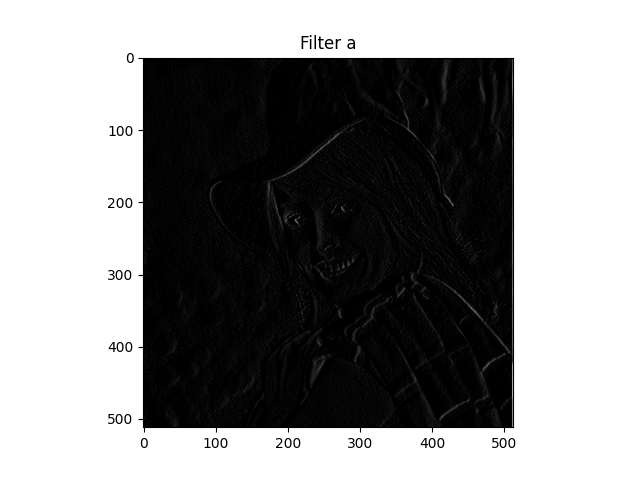

In [ ]:
img_a = apply_filter(img, filter_a.reshape(1,-1))
plt.figure()
plt.imshow(img_a, cmap='gray')
plt.title('Filter a')
plt.show()

In [ ]:
img_b = apply_filter(img, filter_b)
plt.figure()
plt.imshow(img_b, cmap='gray')
plt.title('Filter b')
plt.show()

In [ ]:
img_c = apply_filter(img, filter_c)
plt.figure()
plt.imshow(img_c, cmap='gray')
plt.title('Filter c')
plt.show()

* **filter_a**: This filter is a 1D filter that calculates the difference in pixels in the horizontal direction. It highlights vertical edges in an image.

* **filter_b**: This filter is a 3x3 2D filter that computes the difference between neighboring pixels along the horizontal axis of the image. It highlights vertical edges in an image.

* **filter_c**: This filter is a 3x3 2D filter that computes a weighted
difference between neighboring pixels along the horizontal axis of the image. It highlights the vertical edges in the image. This filter is similar to filter_b, but result in stronger edge.
